# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


In [264]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [265]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 2. Loading and Cleaning with Pandas

In [266]:
train_df=pd.read_csv('/content/drive/MyDrive/train-data.csv')
train_df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [267]:
test_df=pd.read_csv('/content/drive/MyDrive/test-data.csv')
test_df.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [268]:
train_df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [269]:
test_df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [270]:
train_df.shape

(6019, 14)

In [271]:
test_df.shape

(1234, 13)

In [272]:
# deleteing New_Price column since it has 5195 null values and it place zero signicant
train_df.drop(['New_Price'],axis = 1, inplace = True)\
#train size
train_df.shape

(6019, 13)

In [273]:
test_df.drop(['New_Price'],axis = 1, inplace = True)
test_df.shape

(1234, 12)

In [274]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 611.4+ KB


In [275]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 115.8+ KB


In [276]:
train_df.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [277]:
test_df.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [278]:
# Dropping null values
train_df.dropna(inplace = True, axis = 0)
print("New train shape \n",train_df.shape)
test_df.dropna(inplace = True, axis = 0)
print("New test shape \n",test_df.shape)

New train shape 
 (5975, 13)
New test shape 
 (1223, 12)


In [279]:
# removing unnamed columns
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

In [280]:
train_df.head(2)

Name Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG   Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option     Pune  2015              41000   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   

   Price  
0   1.75  
1  12.50

In [281]:
test_df.head(2)

Name    Location  Year  Kilometers_Driven  \
0        Maruti Alto K10 LXI CNG       Delhi  2014              40929   
1  Maruti Alto 800 2016-2019 LXI  Coimbatore  2013              54493   

  Fuel_Type Transmission Owner_Type      Mileage  Engine     Power  Seats  
0       CNG       Manual      First  32.26 km/kg  998 CC  58.2 bhp    4.0  
1    Petrol       Manual     Second    24.7 kmpl  796 CC  47.3 bhp    5.0

In [282]:
# Data Types for train
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [283]:
#data types for test
test_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [284]:
# Finding unique values in Engine, Mileage and Power columns
print(train_df['Engine'].unique())
print(train_df['Mileage'].unique())
print(train_df['Power'].unique())

['998 CC' '1582 CC' '1199 CC' '1248 CC' '1968 CC' '814 CC' '1461 CC'
 '2755 CC' '1598 CC' '1462 CC' '1497 CC' '2179 CC' '2477 CC' '1498 CC'
 '2143 CC' '1995 CC' '1984 CC' '1197 CC' '2494 CC' '1798 CC' '2696 CC'
 '2698 CC' '1061 CC' '1198 CC' '2987 CC' '796 CC' '624 CC' '1999 CC'
 '1991 CC' '2694 CC' '1120 CC' '2498 CC' '799 CC' '2393 CC' '1399 CC'
 '1796 CC' '2148 CC' '1396 CC' '1950 CC' '4806 CC' '1998 CC' '1086 CC'
 '1193 CC' '2982 CC' '1493 CC' '2967 CC' '2993 CC' '1196 CC' '1799 CC'
 '2497 CC' '2354 CC' '1373 CC' '2996 CC' '1591 CC' '2894 CC' '5461 CC'
 '1595 CC' '936 CC' '1997 CC' '1896 CC' '1390 CC' '1364 CC' '2199 CC'
 '993 CC' '999 CC' '1405 CC' '2956 CC' '1794 CC' '995 CC' '2496 CC'
 '1599 CC' '2400 CC' '1495 CC' '2523 CC' '793 CC' '4134 CC' '1596 CC'
 '1395 CC' '2953 CC' '1586 CC' '2362 CC' '1496 CC' '1368 CC' '1298 CC'
 '1956 CC' '1299 CC' '3498 CC' '2835 CC' '1150 CC' '3198 CC' '1343 CC'
 '1499 CC' '1186 CC' '1590 CC' '2609 CC' '2499 CC' '2446 CC' '1978 CC'
 '2360 CC' '3436

In [285]:
# In the above output we can notice that int and str are mixed
# Removing the string from Engine, Mileage and Power columns
train_df["Engine"] = train_df["Engine"].str.replace('CC',' ')
train_df['Mileage'] = train_df['Mileage'].str.replace('km/kg', ' ')
train_df['Mileage'] = train_df['Mileage'].str.replace('kmpl', ' ')
train_df['Power'] = train_df['Power'].str.replace('bhp', ' ')
train_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine    Power  Seats  Price  
0       CNG       Manual      First   26.6     998    58.16      5.0   1.75  
1    Diesel       Manual      First  19.67    1582    126.2      5.0  12.50  
2    Petrol       Manual      First   18.2    1199     88.7      5.0   4.50  
3    Diesel       Manual      First  20.77    1248    88.76      7.0   6.00  
4    Diesel    Automatic     Second   15.2    1968    140.8      5.0  17.74

In [286]:

print(test_df['Engine'].unique())
print(test_df['Mileage'].unique())
print(test_df['Power'].unique())

['998 CC' '796 CC' '2393 CC' '1364 CC' '1197 CC' '2179 CC' '2982 CC'
 '814 CC' '1497 CC' '1968 CC' '1794 CC' '1248 CC' '1598 CC' '1995 CC'
 '1399 CC' '1298 CC' '1198 CC' '1799 CC' '1299 CC' '1498 CC' '1086 CC'
 '2835 CC' '1591 CC' '2494 CC' '1373 CC' '2143 CC' '2953 CC' '1396 CC'
 '1798 CC' '1199 CC' '1196 CC' '1461 CC' '2487 CC' '1582 CC' '2496 CC'
 '1368 CC' '1596 CC' '1595 CC' '2354 CC' '624 CC' '2993 CC' '936 CC'
 '2987 CC' '1999 CC' '999 CC' '2000 CC' '1493 CC' '1120 CC' '3498 CC'
 '1496 CC' '1405 CC' '1896 CC' '2967 CC' '2477 CC' '1948 CC' '1172 CC'
 '1797 CC' '2498 CC' '1061 CC' '1150 CC' '1495 CC' '2499 CC' '1796 CC'
 '2362 CC' '2523 CC' '5998 CC' '2755 CC' '2400 CC' '2349 CC' '995 CC'
 '1998 CC' '2999 CC' '1795 CC' '1984 CC' '793 CC' '1341 CC' '1186 CC'
 '1499 CC' '1991 CC' '799 CC' '1586 CC' '2497 CC' '1956 CC' '1950 CC'
 '1462 CC' '1388 CC' '1997 CC' '3696 CC' '2446 CC' '2198 CC' '2489 CC'
 '2147 CC' '2359 CC' '2996 CC' '2495 CC' '2148 CC' '4395 CC' '1389 CC'
 '1193 CC' '269

In [287]:
test_df["Engine"] = test_df["Engine"].str.replace('CC',' ')
test_df['Mileage'] = test_df['Mileage'].str.replace('km/kg', ' ')
test_df['Mileage'] = test_df['Mileage'].str.replace('kmpl', ' ')
test_df['Power'] = test_df['Power'].str.replace('bhp', ' ')
test_df.head(5)

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First  32.26     998     
1              54493    Petrol       Manual     Second   24.7     796     
2              34000    Diesel       Manual      First  13.68    2393     
3             139000    Diesel       Manual      First  23.59    1364     
4              29000    Petrol       Manual      First   18.5    1197     

     Power  Seats  
0   58.2      4.0  
1   47.3      5.0  
2  147.8      7.0  
3   null      5.0  
4  82.85      5.0

In [288]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [289]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1223 non-null   object 
 1   Location           1223 non-null   object 
 2   Year               1223 non-null   int64  
 3   Kilometers_Driven  1223 non-null   int64  
 4   Fuel_Type          1223 non-null   object 
 5   Transmission       1223 non-null   object 
 6   Owner_Type         1223 non-null   object 
 7   Mileage            1223 non-null   object 
 8   Engine             1223 non-null   object 
 9   Power              1223 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 114.7+ KB


In [290]:
# Converting object to float of Engine, Mileage and Power columns
train_df["Engine"] = train_df["Engine"].astype(float)
train_df["Mileage"] = train_df["Mileage"].astype(float)
test_df["Engine"] = test_df["Engine"].astype(float)
test_df["Mileage"] = test_df["Mileage"].astype(float)

In [291]:
# Since the Power column is object. it conatins float and null values which is very difficult to convert as float
# change the null value to 0 
train_df['Power'] = train_df['Power'].str.replace('null','0')
test_df['Power'] = test_df['Power'].str.replace('null','0')

In [292]:
# Changing dtypes
train_df["Power"] = train_df["Power"].astype(float)
test_df["Power"] = test_df["Power"].astype(float)

In [293]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


In [294]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1223 non-null   object 
 1   Location           1223 non-null   object 
 2   Year               1223 non-null   int64  
 3   Kilometers_Driven  1223 non-null   int64  
 4   Fuel_Type          1223 non-null   object 
 5   Transmission       1223 non-null   object 
 6   Owner_Type         1223 non-null   object 
 7   Mileage            1223 non-null   float64
 8   Engine             1223 non-null   float64
 9   Power              1223 non-null   float64
 10  Seats              1223 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 114.7+ KB


In [295]:
# Replaceing 0 values as nan
train_df['Power'] = train_df['Power'].replace(0, np.nan)
train_df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price                  0
dtype: int64

In [296]:
# Replaceing 0 values as nan
test_df['Power'] = test_df['Power'].replace(0, np.nan)
test_df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                22
Seats                 0
dtype: int64

In [297]:
# Checking and dropping null values
train_df.dropna(inplace = True)
print(train_df.shape)
train_df.isnull().sum()

(5872, 12)


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [298]:
# Checking and dropping null values
test_df.dropna(inplace = True)
print(test_df.shape)
test_df.isnull().sum()

(1201, 11)


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

#3. EDA and Visualization

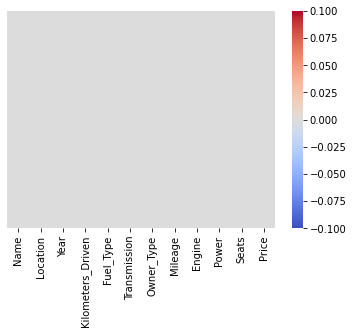

In [299]:
# Checking null values
sns.heatmap(train_df.isnull(), yticklabels = False, cmap = 'coolwarm')

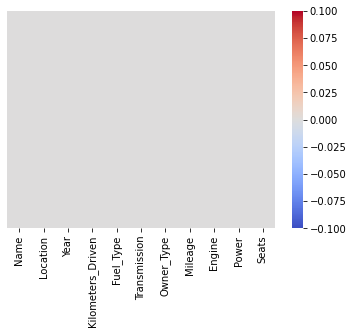

In [300]:
sns.heatmap(test_df.isnull(), yticklabels = False, cmap = 'coolwarm')

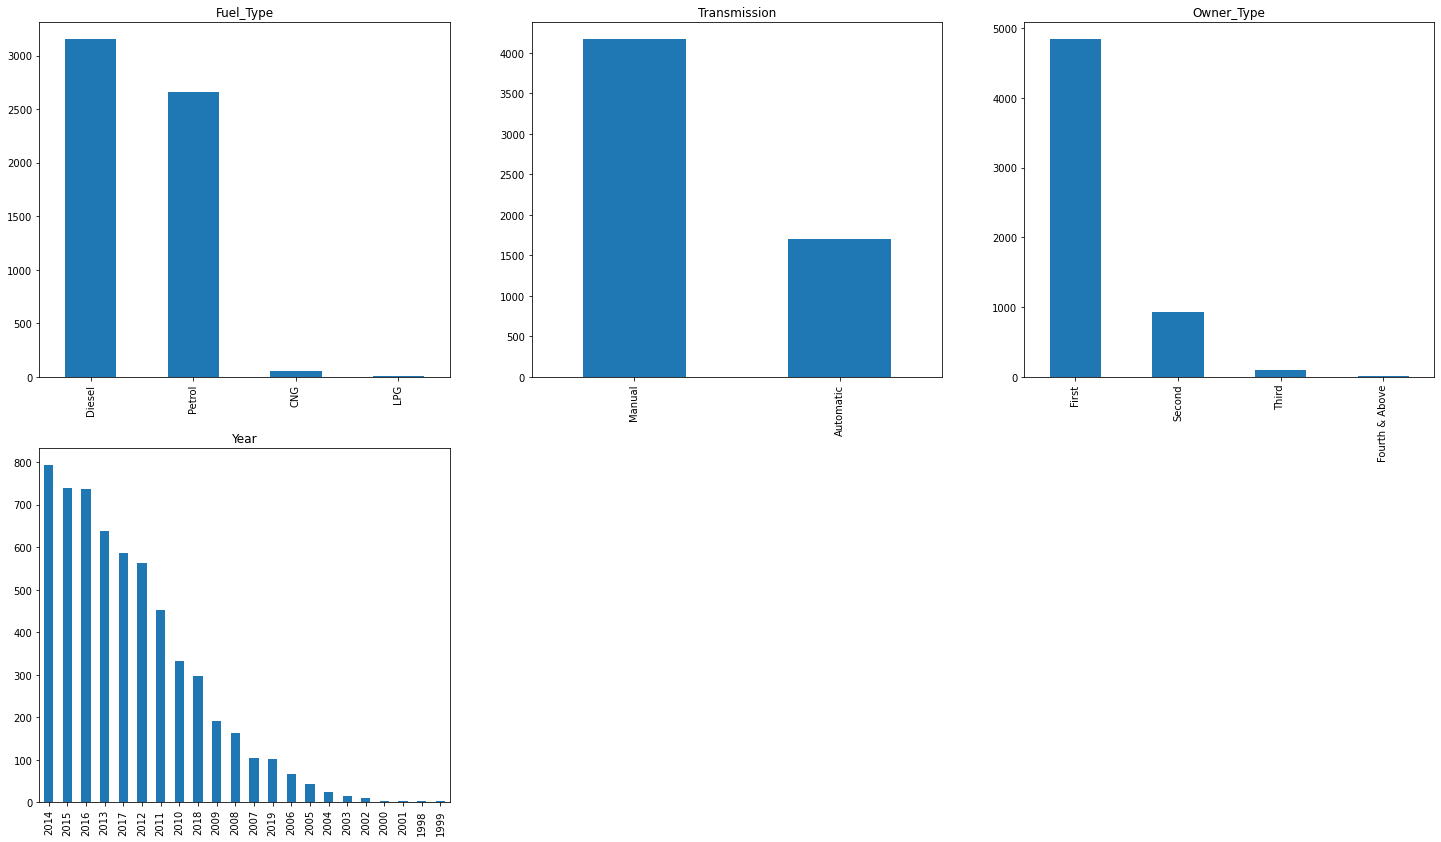

In [301]:
# Listing categorical columns for checking data imbalance and plotting them
col_category = ['Fuel_Type','Transmission','Owner_Type','Year']

k=0
plt.figure(figsize=(25,30))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    train_df[col].value_counts().plot(kind='bar');
    plt.title(col)

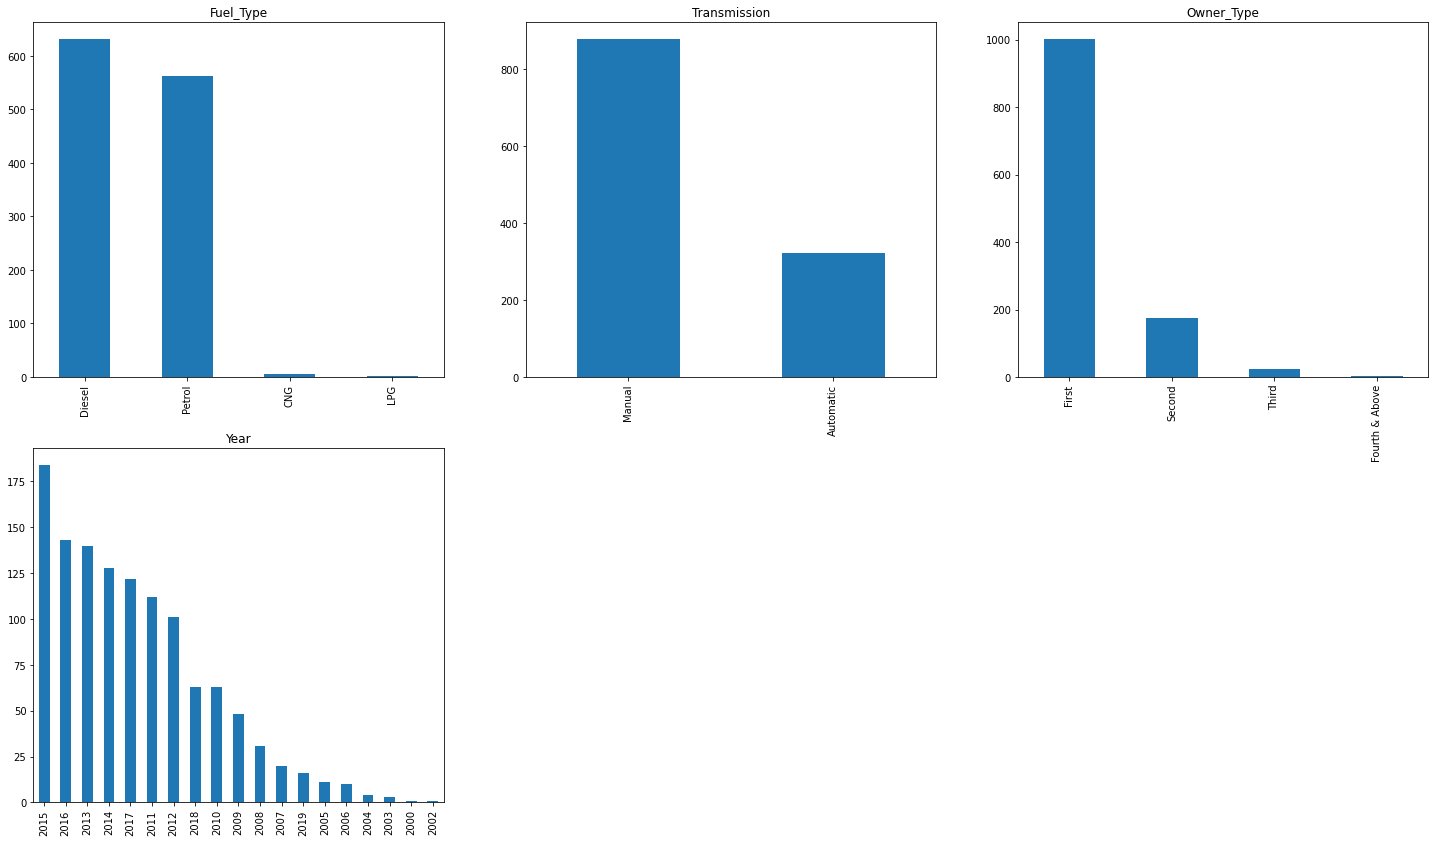

In [302]:
col_category1 = ['Fuel_Type','Transmission','Owner_Type','Year']

k=0
plt.figure(figsize=(25,30))
for col in col_category1:    
    k=k+1
    plt.subplot(4, 3,k)    
    test_df[col].value_counts().plot(kind='bar');
    plt.title(col)

In [303]:
# Finding correlation of columns with Price
corr = train_df.corr()['Price']
corr

Year                 0.299475
Kilometers_Driven   -0.008249
Mileage             -0.341652
Engine               0.658047
Power                0.772843
Seats                0.055547
Price                1.000000
Name: Price, dtype: float64

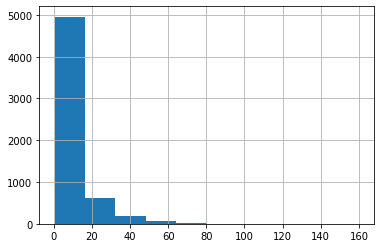

In [304]:
train_df["Price"].hist()

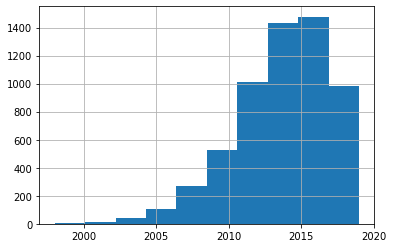

In [305]:
train_df["Year"].hist() 

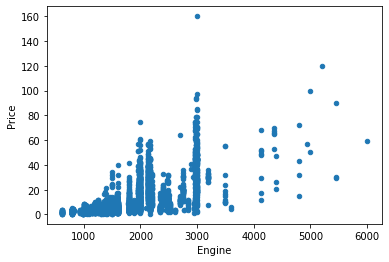

In [306]:
# Scatter plot
train_df.plot(x = 'Engine', y = 'Price', kind = 'scatter')

# 4. Feature Engineering


In [307]:
# Checking the distribution of categorial data(train_df)
print(train_df.Fuel_Type.value_counts())
print(train_df.Transmission.value_counts())
print(train_df.Owner_Type.value_counts())
print(train_df.Seats.value_counts())

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64
5.0     4919
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64


In [308]:
print(test_df.Fuel_Type.value_counts())
print(test_df.Transmission.value_counts())
print(test_df.Owner_Type.value_counts())
print(test_df.Seats.value_counts())

Diesel    631
Petrol    562
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64
Manual       878
Automatic    323
Name: Transmission, dtype: int64
First             1001
Second             175
Third               23
Fourth & Above       2
Name: Owner_Type, dtype: int64
5.0     1011
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64


In [309]:
# One hot encoding for Categorical data
train_df.replace({'Fuel_Type':{'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG':3}}, inplace = True)
train_df.replace({'Transmission':{'Automatic': 0, 'Manual': 1}}, inplace = True)
train_df.replace({'Owner_Type':{'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above':3}}, inplace = True)
train_df.head(5)

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

   Fuel_Type  Transmission  Owner_Type  Mileage  Engine   Power  Seats  Price  
0          2             1           0    26.60   998.0   58.16    5.0   1.75  
1          0             1           0    19.67  1582.0  126.20    5.0  12.50  
2          1             1           0    18.20  1199.0   88.70    5.0   4.50  
3          0             1           0    20.77  1248.0   88.76    7.0   6.00  
4          0             0           1    15.20  1968.0  140.80    5.0  17.74

In [310]:
test_df.replace({'Fuel_Type':{'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG':3}}, inplace = True)
test_df.replace({'Transmission':{'Automatic': 0, 'Manual': 1}}, inplace = True)
test_df.replace({'Owner_Type':{'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above':3}}, inplace = True)
test_df.head(5)

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
4                          Hyundai i20 Magna      Mumbai  2014   
5                     Mahindra XUV500 W8 2WD  Coimbatore  2016   

   Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0              40929          2             1           0    32.26   998.0   
1              54493          1             1           1    24.70   796.0   
2              34000          0             1           0    13.68  2393.0   
4              29000          1             1           0    18.50  1197.0   
5              85609          0             1           1    16.00  2179.0   

    Power  Seats  
0   58.20    4.0  
1   47.30    5.0  
2  147.80    7.0  
4   82.85    5.0  
5  140.00    7.0

In [311]:
# Creating columns for checking outliners
cols=['Engine', 'Mileage','Kilometers_Driven']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


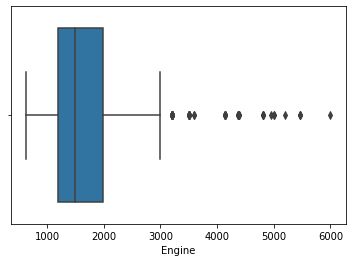

In [312]:
# Engine outlier
sns.boxplot(train_df[cols[0]]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


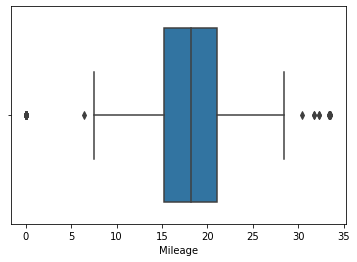

In [313]:
# Mileage outlier
sns.boxplot(train_df[cols[1]]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


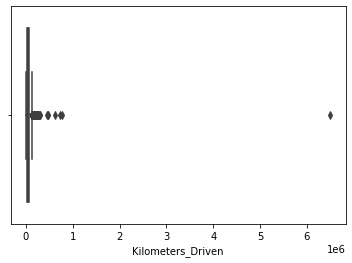

In [314]:
# Kilometer_Driven outlier
sns.boxplot(train_df[cols[2]]);

In [315]:
#Quantile Range(IQR) method.
def find_outliers_limit(train_df,col):
    print(col)
    print('-'*50)
    #removing outliers
    Q1, Q3 = np.percentile(train_df[col], 25), np.percentile(train_df[col], 75)
    IQR = Q3 - Q1
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (Q1, Q3, IQR))
    # calculate the outlier cutoff
    # upperlimit = Q3 + (IQR * 1.5)cut_off
    # lowerlimit = Q1 - (IQR * 1.5)cut_off
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(train_df,col,upper,lower):
  # identify outliers
  outliers = ["x for x in train_df[col] if x  upper"]
  print('Identified outliers: %d' % len(outliers))
  # remove outliers
  outliers_removed = [x for x in train_df[col] if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))
  final= np.where(train_df[col]>upper,upper,np.where(train_df[col]<lower,lower,train_df[col]))
  return final
outlier_cols=['Engine','Mileage','Kilometers_Driven']
for col in outlier_cols:
  lower,upper=find_outliers_limit(train_df,col)
  train_df[col] = remove_outlier(train_df,col,upper,lower)


Engine
--------------------------------------------------
Percentiles: 25th=1198.000, 75th=1991.000, IQR=793.000
Lower: 8.5  Upper: 3180.5
Identified outliers: 1
Non-outlier observations: 5814
Mileage
--------------------------------------------------
Percentiles: 25th=15.260, 75th=21.100, IQR=5.840
Lower: 6.499999999999998  Upper: 29.860000000000003
Identified outliers: 1
Non-outlier observations: 5829
Kilometers_Driven
--------------------------------------------------
Percentiles: 25th=33422.500, 75th=72402.750, IQR=38980.250
Lower: -25047.875  Upper: 130873.125
Identified outliers: 1
Non-outlier observations: 5673


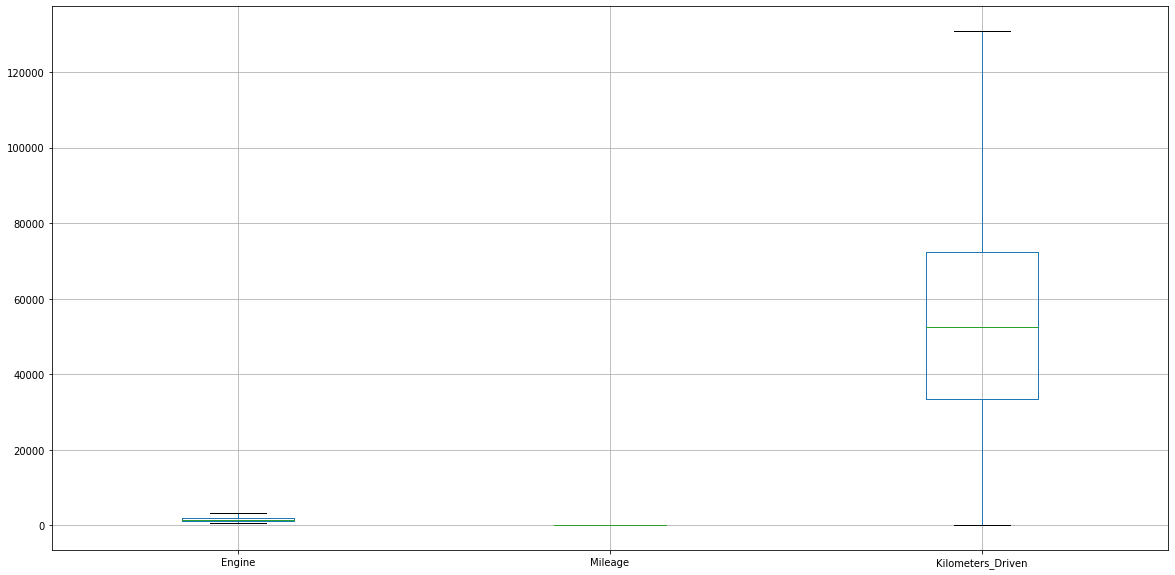

In [316]:
# After removing outliers
plt.figure(figsize=(20,10))
train_df[outlier_cols].boxplot()

In [317]:
# Creating columns for checking outliners
cols1=['Engine', 'Mileage','Kilometers_Driven']

In [318]:
#Quantile Range(IQR) method.
def find_outliers_limit(test_df,col):
    print(col)
    print('-'*50)
    #removing outliers
    Q1, Q3 = np.percentile(test_df[col], 25), np.percentile(test_df[col], 75)
    IQR = Q3 - Q1
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (Q1, Q3, IQR))
    # calculate the outlier cutoff
    # upperlimit = Q3 + (IQR * 1.5)cut_off
    # lowerlimit = Q1 - (IQR * 1.5)cut_off
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(test_df,col,upper,lower):
  # identify outliers
  outliers = ["x for x in train_df[col] if x  upper"]
  print('Identified outliers: %d' % len(outliers))
  # remove outliers
  outliers_removed = [x for x in test_df[col] if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))
  final= np.where(test_df[col]>upper,upper,np.where(test_df[col]<lower,lower,test_df[col]))
  return final
outlier_cols1=['Engine','Mileage','Kilometers_Driven']
for col in outlier_cols1:
  lower,upper=find_outliers_limit(test_df,col)
  test_df[col] = remove_outlier(test_df,col,upper,lower)


Engine
--------------------------------------------------
Percentiles: 25th=1198.000, 75th=1968.000, IQR=770.000
Lower: 43.0  Upper: 3123.0
Identified outliers: 1
Non-outlier observations: 1197
Mileage
--------------------------------------------------
Percentiles: 25th=15.290, 75th=21.100, IQR=5.810
Lower: 6.574999999999996  Upper: 29.815000000000005
Identified outliers: 1
Non-outlier observations: 1191
Kilometers_Driven
--------------------------------------------------
Percentiles: 25th=33544.000, 75th=74000.000, IQR=40456.000
Lower: -27140.0  Upper: 134684.0
Identified outliers: 1
Non-outlier observations: 1157


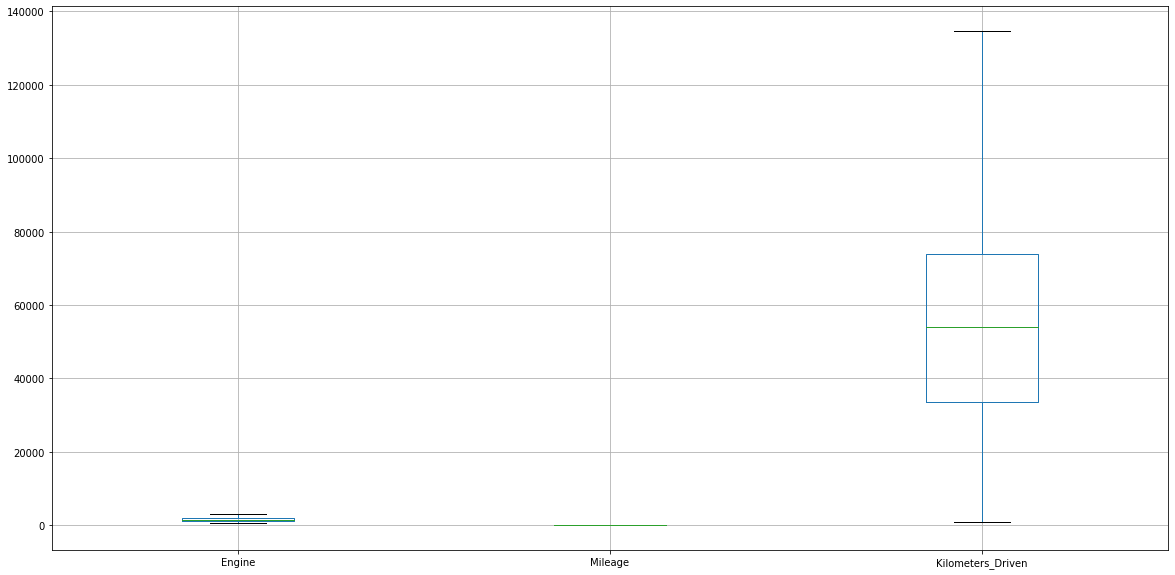

In [319]:
# After removing outliers
plt.figure(figsize=(20,10))
test_df[outlier_cols1].boxplot()

In [320]:
#Changing Categorical data into Quantitative data using Get_dummies function
train_df = pd.get_dummies(train_df,columns=['Location','Seats'])
train_df.head(5)

Name  Year  Kilometers_Driven  Fuel_Type  \
0            Maruti Wagon R LXI CNG  2010            72000.0          2   
1  Hyundai Creta 1.6 CRDi SX Option  2015            41000.0          0   
2                      Honda Jazz V  2011            46000.0          1   
3                 Maruti Ertiga VDI  2012            87000.0          0   
4   Audi A4 New 2.0 TDI Multitronic  2013            40670.0          0   

   Transmission  Owner_Type  Mileage  Engine   Power  Price  ...  \
0             1           0    26.60   998.0   58.16   1.75  ...   
1             1           0    19.67  1582.0  126.20  12.50  ...   
2             1           0    18.20  1199.0   88.70   4.50  ...   
3             1           0    20.77  1248.0   88.76   6.00  ...   
4             0           1    15.20  1968.0  140.80  17.74  ...   

   Location_Mumbai  Location_Pune  Seats_2.0  Seats_4.0  Seats_5.0  Seats_6.0  \
0                1              0          0          0          1          0   
1                0              1          0          0          1          0   
2                0              0          0          0          1          0   
3                0              0          0          0          0          0   
4                0              0          0          0          1          0   

   Seats_7.0  Seats_8.0  Seats_9.0  Seats_10.0  
0          0          0          0           0  
1          0          0          0           0  
2          0          0          0           0  
3          1          0          0           0  
4          0          0          0           0  

[5 rows x 29 columns]

In [321]:
#Changing Categorical data into Quantitative data using Get_dummies function
test_df = pd.get_dummies(test_df,columns=['Location','Seats'])
test_df.head(5)

Name  Year  Kilometers_Driven  \
0                    Maruti Alto K10 LXI CNG  2014            40929.0   
1              Maruti Alto 800 2016-2019 LXI  2013            54493.0   
2  Toyota Innova Crysta Touring Sport 2.4 MT  2017            34000.0   
4                          Hyundai i20 Magna  2014            29000.0   
5                     Mahindra XUV500 W8 2WD  2016            85609.0   

   Fuel_Type  Transmission  Owner_Type  Mileage  Engine   Power  \
0          2             1           0   29.815   998.0   58.20   
1          1             1           1   24.700   796.0   47.30   
2          0             1           0   13.680  2393.0  147.80   
4          1             1           0   18.500  1197.0   82.85   
5          0             1           1   16.000  2179.0  140.00   

   Location_Ahmedabad  ...  Location_Kolkata  Location_Mumbai  Location_Pune  \
0                   0  ...                 0                0              0   
1                   0  ...                 0                0              0   
2                   0  ...                 0                1              0   
4                   0  ...                 0                1              0   
5                   0  ...                 0                0              0   

   Seats_2.0  Seats_4.0  Seats_5.0  Seats_6.0  Seats_7.0  Seats_8.0  \
0          0          1          0          0          0          0   
1          0          0          1          0          0          0   
2          0          0          0          0          1          0   
4          0          0          1          0          0          0   
5          0          0          0          0          1          0   

   Seats_10.0  
0           0  
1           0  
2           0  
4           0  
5           0  

[5 rows x 27 columns]

In [322]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 5872 non-null   object 
 1   Year                 5872 non-null   int64  
 2   Kilometers_Driven    5872 non-null   float64
 3   Fuel_Type            5872 non-null   int64  
 4   Transmission         5872 non-null   int64  
 5   Owner_Type           5872 non-null   int64  
 6   Mileage              5872 non-null   float64
 7   Engine               5872 non-null   float64
 8   Power                5872 non-null   float64
 9   Price                5872 non-null   float64
 10  Location_Ahmedabad   5872 non-null   uint8  
 11  Location_Bangalore   5872 non-null   uint8  
 12  Location_Chennai     5872 non-null   uint8  
 13  Location_Coimbatore  5872 non-null   uint8  
 14  Location_Delhi       5872 non-null   uint8  
 15  Location_Hyderabad   5872 non-null   u

In [323]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1201 non-null   object 
 1   Year                 1201 non-null   int64  
 2   Kilometers_Driven    1201 non-null   float64
 3   Fuel_Type            1201 non-null   int64  
 4   Transmission         1201 non-null   int64  
 5   Owner_Type           1201 non-null   int64  
 6   Mileage              1201 non-null   float64
 7   Engine               1201 non-null   float64
 8   Power                1201 non-null   float64
 9   Location_Ahmedabad   1201 non-null   uint8  
 10  Location_Bangalore   1201 non-null   uint8  
 11  Location_Chennai     1201 non-null   uint8  
 12  Location_Coimbatore  1201 non-null   uint8  
 13  Location_Delhi       1201 non-null   uint8  
 14  Location_Hyderabad   1201 non-null   uint8  
 15  Location_Jaipur      1201 non-null   u

# 5. Training Model

In [324]:
# Combining test and train df
final_df = pd.concat([train_df, test_df], axis = 0)
print(final_df.shape)
final_df.head(5)

(7073, 29)


Name  Year  Kilometers_Driven  Fuel_Type  \
0            Maruti Wagon R LXI CNG  2010            72000.0          2   
1  Hyundai Creta 1.6 CRDi SX Option  2015            41000.0          0   
2                      Honda Jazz V  2011            46000.0          1   
3                 Maruti Ertiga VDI  2012            87000.0          0   
4   Audi A4 New 2.0 TDI Multitronic  2013            40670.0          0   

   Transmission  Owner_Type  Mileage  Engine   Power  Price  ...  \
0             1           0    26.60   998.0   58.16   1.75  ...   
1             1           0    19.67  1582.0  126.20  12.50  ...   
2             1           0    18.20  1199.0   88.70   4.50  ...   
3             1           0    20.77  1248.0   88.76   6.00  ...   
4             0           1    15.20  1968.0  140.80  17.74  ...   

   Location_Mumbai  Location_Pune  Seats_2.0  Seats_4.0  Seats_5.0  Seats_6.0  \
0                1              0          0          0          1          0   
1                0              1          0          0          1          0   
2                0              0          0          0          1          0   
3                0              0          0          0          0          0   
4                0              0          0          0          1          0   

   Seats_7.0  Seats_8.0  Seats_9.0  Seats_10.0  
0          0          0        0.0           0  
1          0          0        0.0           0  
2          0          0        0.0           0  
3          1          0        0.0           0  
4          0          0        0.0           0  

[5 rows x 29 columns]

In [325]:
# Removing duplicates values
final_df = final_df.loc[:,~final_df.columns.duplicated()]
print(final_df.shape)
final_df.isnull().sum()

(7073, 29)


Name                      0
Year                      0
Kilometers_Driven         0
Fuel_Type                 0
Transmission              0
Owner_Type                0
Mileage                   0
Engine                    0
Power                     0
Price                  1201
Location_Ahmedabad        0
Location_Bangalore        0
Location_Chennai          0
Location_Coimbatore       0
Location_Delhi            0
Location_Hyderabad        0
Location_Jaipur           0
Location_Kochi            0
Location_Kolkata          0
Location_Mumbai           0
Location_Pune             0
Seats_2.0                 0
Seats_4.0                 0
Seats_5.0                 0
Seats_6.0                 0
Seats_7.0                 0
Seats_8.0                 0
Seats_9.0              1201
Seats_10.0                0
dtype: int64

In [326]:
final_df.dropna(inplace = True)
print(final_df.shape)
final_df.isnull().sum()

(5872, 29)


Name                   0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Price                  0
Location_Ahmedabad     0
Location_Bangalore     0
Location_Chennai       0
Location_Coimbatore    0
Location_Delhi         0
Location_Hyderabad     0
Location_Jaipur        0
Location_Kochi         0
Location_Kolkata       0
Location_Mumbai        0
Location_Pune          0
Seats_2.0              0
Seats_4.0              0
Seats_5.0              0
Seats_6.0              0
Seats_7.0              0
Seats_8.0              0
Seats_9.0              0
Seats_10.0             0
dtype: int64

In [327]:
# Selecting target columns as price
y = final_df['Price']
X = final_df.drop(['Price','Name'], axis = 1)

In [328]:
y.dtypes

dtype('float64')

In [329]:
y.head(2)

0     1.75
1    12.50
Name: Price, dtype: float64

In [330]:
X.head(2)

Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0  2010            72000.0          2             1           0    26.60   
1  2015            41000.0          0             1           0    19.67   

   Engine   Power  Location_Ahmedabad  Location_Bangalore  ...  \
0   998.0   58.16                   0                   0  ...   
1  1582.0  126.20                   0                   0  ...   

   Location_Mumbai  Location_Pune  Seats_2.0  Seats_4.0  Seats_5.0  Seats_6.0  \
0                1              0          0          0          1          0   
1                0              1          0          0          1          0   

   Seats_7.0  Seats_8.0  Seats_9.0  Seats_10.0  
0          0          0        0.0           0  
1          0          0        0.0           0  

[2 rows x 27 columns]

In [331]:
#Splitting of the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [332]:
# Checking shape of all splitted data
print("X_train",X_train.shape,"X_test",X_test.shape,"y_train",y_train.shape,"y_test",y_test.shape)

X_train (4697, 27) X_test (1175, 27) y_train (4697,) y_test (1175,)


In [333]:
X_train.head(2)

Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
2126  2007         130873.125          0             1           1    12.80   
5253  2011          57000.000          0             0           1    14.94   

      Engine  Power  Location_Ahmedabad  Location_Bangalore  ...  \
2126  2494.0  102.0                   0                   0  ...   
5253  2143.0  204.0                   0                   0  ...   

      Location_Mumbai  Location_Pune  Seats_2.0  Seats_4.0  Seats_5.0  \
2126                0              1          0          0          0   
5253                0              0          0          0          1   

      Seats_6.0  Seats_7.0  Seats_8.0  Seats_9.0  Seats_10.0  
2126          0          0          1        0.0           0  
5253          0          0          0        0.0           0  

[2 rows x 27 columns]

In [334]:
X_test.head(2)

Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
4009  2017            25000.0          1             1           0     10.4   
3094  2007            75000.0          1             1           1     16.6   

      Engine  Power  Location_Ahmedabad  Location_Bangalore  ...  \
4009  2393.0  163.5                   0                   0  ...   
3094  1388.0   68.0                   0                   0  ...   

      Location_Mumbai  Location_Pune  Seats_2.0  Seats_4.0  Seats_5.0  \
4009                1              0          0          0          1   
3094                0              0          0          0          1   

      Seats_6.0  Seats_7.0  Seats_8.0  Seats_9.0  Seats_10.0  
4009          0          0          0        0.0           0  
3094          0          0          0        0.0           0  

[2 rows x 27 columns]

In [335]:
y_train.max()

160.0

In [336]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# Using standard scaler for features preprocessing
scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [337]:
 # Creating the model using scikit learn 
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train, y_train)

LinearRegression()

# 6. Prediction

In [338]:
# Make a prediction against the test set to score our model
y_pred = regression_model.predict(X_test)
y_pred

array([18.43675515, -3.42408469,  3.83847329, ...,  3.36551914,
        9.6151987 , 28.69393405])

# 7. Evaluating your Model

In [339]:
from sklearn.metrics import r2_score 
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)
print("Train set Accuracy :", r2_score(y_train,y_train_pred))
print("Test set Accuracy :", r2_score(y_test,y_test_pred))

Train set Accuracy : 0.7209253383588103
Test set Accuracy : 0.7103705083676028


In [340]:
# Errors
print('R-squared training data: ', regression_model.score(X_train, y_train))
print('R-squared test data: ', regression_model.score(X_test, y_test))
print('Mean Sqaured Error(MSE): ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error(MAE): ', mean_absolute_error(y_test, y_pred))
print('Root Mean Square Error(RMSE): ', np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared training data:  0.7209253383588103
R-squared test data:  0.7103705083676028
Mean Sqaured Error(MSE):  31.881445954586006
Mean Absolute Error(MAE):  3.463403253697245
Root Mean Square Error(RMSE):  5.646365729793458


In [341]:
Result = pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_test_pred})
Result.tail(100)

Actual Price  Predicted Price
5981          7.50         6.803210
4189          5.25         4.855578
3691          4.70         7.336505
1275          5.10         4.313464
2311         54.45        37.510180
...            ...              ...
5677          8.85         8.115573
2032          2.49        -0.463666
1051          3.80         3.365519
5942          6.50         9.615199
1209         38.00        28.693934

[100 rows x 2 columns]

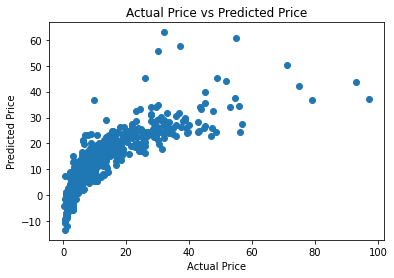

In [342]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# SUBMISSION DATE: 17 April 2022

*   List item
*   List item

